<a href="https://colab.research.google.com/github/MamidiPravallikaReddy/ML-LAB/blob/main/ML(assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Experiment with regression, regularization, and cross-validation on BankNote_Authentication dataset**

In [1]:
import numpy as np
import pandas as pd

**(a) Load the data into memory. Make an appropriate X matrix and y vector.**

In [96]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("/content/college_student_placements_factor.csv")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [5]:
print(df.isnull().sum())

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64


In [81]:
# label_cols = ['College_ID', 'Internship_Experience', 'Placement']
# for col in label_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])

In [22]:
X = df.drop(columns=['CGPA', 'Placement'])
y = df['Placement']
print(X.shape)
print(y.shape)

(10000, 8)
(10000,)


**(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances)**

In [102]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=42
)

label_cols_X = ['College_ID', 'Internship_Experience']
for col in label_cols_X:
    le = LabelEncoder()
    Xtrain[col] = le.fit_transform(Xtrain[col])
    Xtest[col] = le.transform(Xtest[col])

print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

Xtrain shape: (8000, 8)
Xtest shape: (2000, 8)
ytrain shape: (8000,)
ytest shape: (2000,)


**(C) Objective of Logistic Regression with L2 regularization:**


*   Prevents overfitting by adding a penalty term to the loss function. This penalty is proportional to the square of the magnitude of the coefficients (weights).
*   The standard loss function:

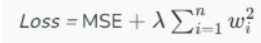




'λ' is the regularization parameter that controls the strength of the penalty, and wi are the coefficients.

*   Coefficients become as small as possible but not zero, so that no feature dominate the other.
*   In this regression all features are considered.


*   The larger the ' λ ' value, the stronger the regularization, and the smaller the coefficients will become.









**(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see**.

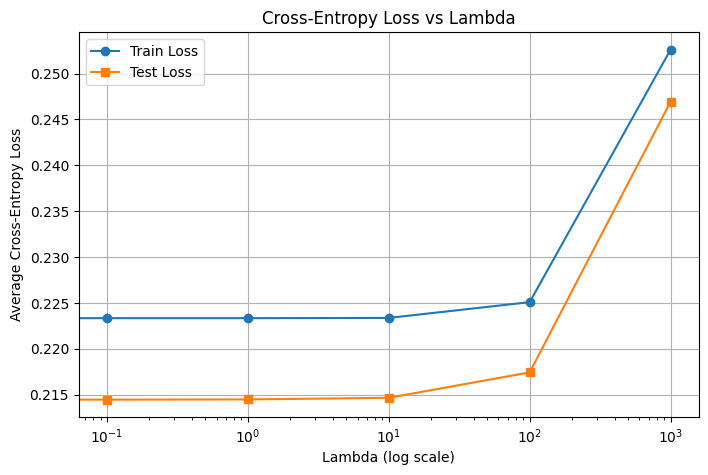

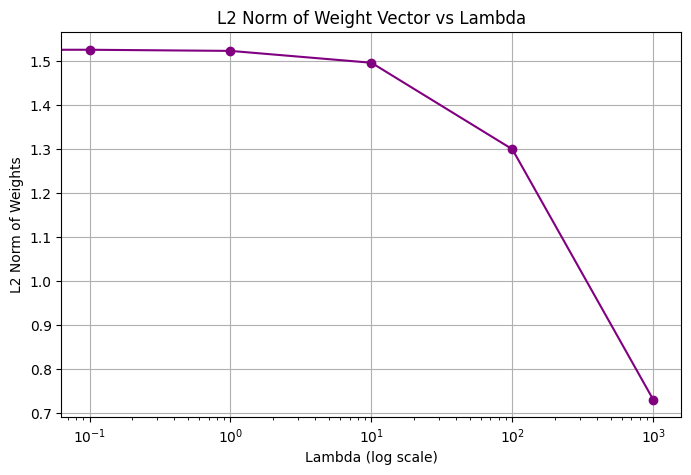

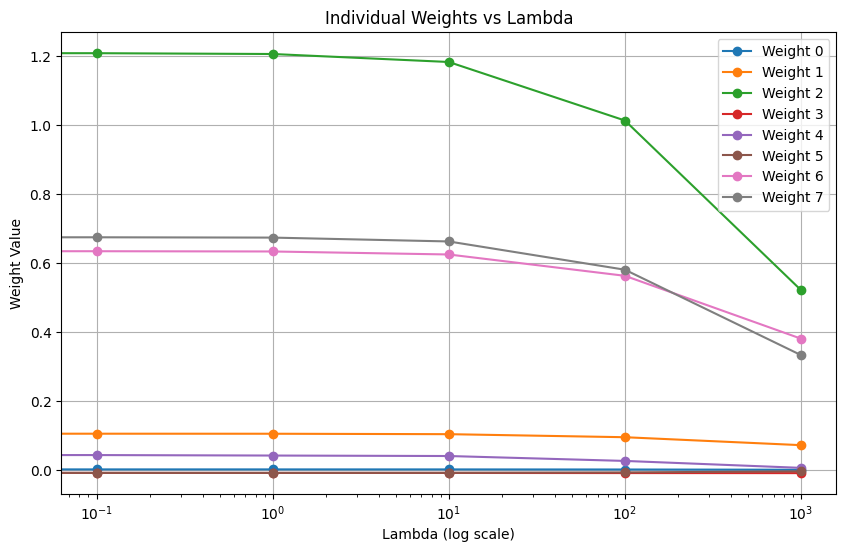

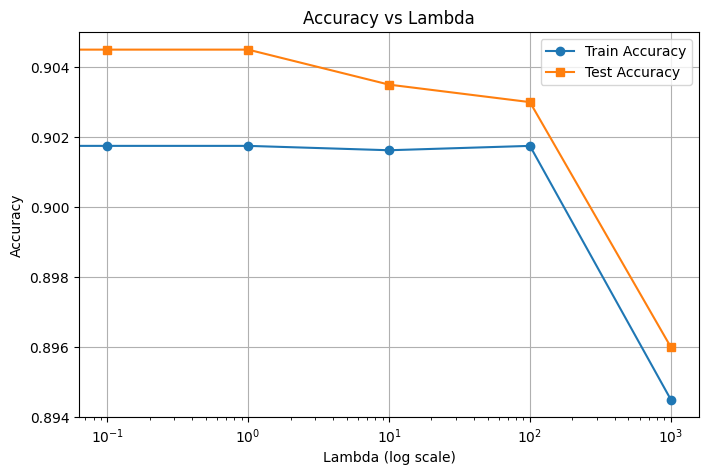

In [101]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Ensure pandas is imported

# Assuming 'df' is your original DataFrame loaded from the CSV

# Define features (X) and target (y) from the original DataFrame
X = df.drop(columns=['CGPA', 'Placement'])
y = df['Placement']

# Split the data: 80% train+validation, 20% test
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply label encoding to 'College_ID' and 'Internship_Experience' after splitting
label_cols_X = ['College_ID', 'Internship_Experience']
for col in label_cols_X:
    le = LabelEncoder()
    Xtrain[col] = le.fit_transform(Xtrain[col])
    Xtest[col] = le.transform(Xtest[col]) # Use transform on test to avoid new labels


# Define regularization parameters (λ)
lambdas = [0, 0.1, 1, 10, 100, 1000]

# Lists to store metrics
train_loss = []
test_loss = []
train_acc = []
test_acc = []
weights_norm = []
weights_all = []

# Loop over λ values
for l in lambdas:
    # scikit-learn uses 'C' = 1/λ for regularization strength
    # For λ = 0, use very large C (no regularization)
    C_val = 1e12 if l == 0 else 1/l

    # Initialize Logistic Regression
    model = LogisticRegression(penalty='l2', C=C_val, solver='lbfgs', max_iter=1000)

    # Fit model
    model.fit(Xtrain, ytrain)

    # Predictions (probabilities)
    ytrain_prob = model.predict_proba(Xtrain)[:, 1]
    ytest_prob = model.predict_proba(Xtest)[:, 1]

    # Log-loss (cross-entropy)
    train_loss.append(log_loss(ytrain, ytrain_prob))
    test_loss.append(log_loss(ytest, ytest_prob))

    # Accuracy
    train_acc.append(accuracy_score(ytrain, model.predict(Xtrain)))
    test_acc.append(accuracy_score(ytest, model.predict(Xtest)))

    # L2 norm of weights
    weights_norm.append(np.linalg.norm(model.coef_))

    # Store individual weights
    weights_all.append(model.coef_[0])

# Convert weights_all to array for plotting
weights_all = np.array(weights_all)

# --- Plot 1: Cross-Entropy Loss ---
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_loss, marker='o', label='Train Loss')
plt.plot(lambdas, test_loss, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Average Cross-Entropy Loss')
plt.title('Cross-Entropy Loss vs Lambda')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: L2 Norm of Weight Vector ---
plt.figure(figsize=(8,5))
plt.plot(lambdas, weights_norm, marker='o', color='purple')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm of Weight Vector vs Lambda')
plt.grid(True)
plt.show()

# --- Plot 3: Individual Weights ---
plt.figure(figsize=(10,6))
for i in range(weights_all.shape[1]):
    plt.plot(lambdas, weights_all[:, i], marker='o', label=f'Weight {i}')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Weight Value')
plt.title('Individual Weights vs Lambda')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 4: Accuracy ---
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_acc, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_acc, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda')
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

**1.Cross-Entropy vs λ**



*   When λ is small (less regularization) → Cross-entropy loss is very low (almost zero) for both train and test → The model fits well..
*   When λ becomes large → Loss increases significantly → Model becomes too simple (underfitting)



**2.L2 Norm of Weights vs λ**

*   As λ increases, the L2 norm of weights decreases → Stronger regularization shrinks weights toward zero.



**3.Weights vs λ (Bottom-Right)**


*   Each weight curve moves toward zero as λ increases.
*   With no regularization (λ = 0), weights have large magnitude → Model complexity is high.



**4.Accuracy Vs λ**


*   Accuracy is highest when λ is small (0.1, 1).
*   Accuracy drops when λ becomes very large (100, 1000) because the model underfits.











**(e) Re-format the data in the following way: take each of the input variables, and feed it through a set of Gaussian basis functions, defined as follows. For each variable (except the bias term), use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ. You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.**

In [25]:
def gaussian_basis_transform(X, num_basis=5, mu_range=(-10, 10), sigma=1.0):

    n_samples, n_features = X.shape
    mus = np.linspace(mu_range[0], mu_range[1], num_basis)

    X_transformed = []

    for j in range(n_features):
        for mu in mus:

            phi = np.exp(- ((X[:, j] - mu)**2) / (2 * sigma**2))
            X_transformed.append(phi)


    X_transformed = np.column_stack(X_transformed)
    return X_transformed

sigma_values = [0.1, 0.5, 1, 5, 10]

for sigma in sigma_values:
    print(f"\n--- Gaussian Basis Transform with sigma = {sigma} ---")
    Xtrain_g = gaussian_basis_transform(Xtrain.values, num_basis=5, mu_range=(-10,10), sigma=sigma)
    Xtest_g  = gaussian_basis_transform(Xtest.values, num_basis=5, mu_range=(-10,10), sigma=sigma)

    print("Transformed Xtrain shape:", Xtrain_g.shape)
    print("Transformed Xtest shape:", Xtest_g.shape)



--- Gaussian Basis Transform with sigma = 0.1 ---
Transformed Xtrain shape: (8000, 40)
Transformed Xtest shape: (2000, 40)

--- Gaussian Basis Transform with sigma = 0.5 ---
Transformed Xtrain shape: (8000, 40)
Transformed Xtest shape: (2000, 40)

--- Gaussian Basis Transform with sigma = 1 ---
Transformed Xtrain shape: (8000, 40)
Transformed Xtest shape: (2000, 40)

--- Gaussian Basis Transform with sigma = 5 ---
Transformed Xtrain shape: (8000, 40)
Transformed Xtest shape: (2000, 40)

--- Gaussian Basis Transform with sigma = 10 ---
Transformed Xtrain shape: (8000, 40)
Transformed Xtest shape: (2000, 40)


**(f) Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off.**

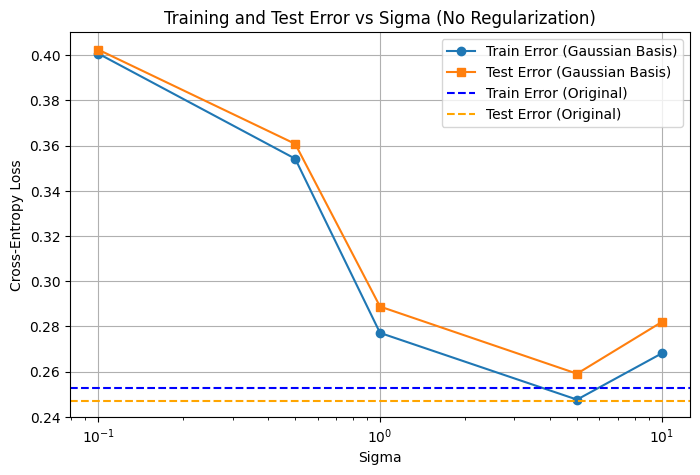

In [26]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

sigma_values = [0.1, 0.5, 1, 5, 10]

train_errors = []
test_errors = []

ref_train_error = train_loss[-1]
ref_test_error  = test_loss[-1]

for sigma in sigma_values:

    Xtrain_g = gaussian_basis_transform(Xtrain.values, num_basis=5, mu_range=(-10,10), sigma=sigma)
    Xtest_g  = gaussian_basis_transform(Xtest.values, num_basis=5, mu_range=(-10,10), sigma=sigma)


    model = LogisticRegression(penalty='l2', C=1e12, solver='lbfgs', max_iter=1000)
    model.fit(Xtrain_g, ytrain)

    ytrain_prob = model.predict_proba(Xtrain_g)[:, 1]
    ytest_prob  = model.predict_proba(Xtest_g)[:, 1]


    train_errors.append(log_loss(ytrain, ytrain_prob))
    test_errors.append(log_loss(ytest, ytest_prob))

plt.figure(figsize=(8,5))
plt.plot(sigma_values, train_errors, marker='o', label='Train Error (Gaussian Basis)')
plt.plot(sigma_values, test_errors, marker='s', label='Test Error (Gaussian Basis)')
plt.axhline(y=ref_train_error, color='blue', linestyle='--', label='Train Error (Original)')
plt.axhline(y=ref_test_error, color='orange', linestyle='--', label='Test Error (Original)')
plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training and Test Error vs Sigma (No Regularization)')
plt.legend()
plt.grid(True)
plt.show()




*   **Train Error (blue line with circles):**
Starts high for very small σ, drops to a minimum at medium σ (≈1–5), then rises again for very large σ.
*   **Test Error (orange line with squares):**
Follows a similar pattern—best performance at medium σ, worse for very small or very large σ.

*   **Dashed lines (original features):**
Show the baseline errors without Gaussian basis functions. In your plot, at the optimal σ, both training and test errors are lower than the dashed baseline → Gaussian features improved performance.





**(g) Add in all the basis function and perform regularized regression with the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy error for the training data and the testing data, as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different graph the L2 norm of the weights for the set of basis functions corresponding to each value of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.**

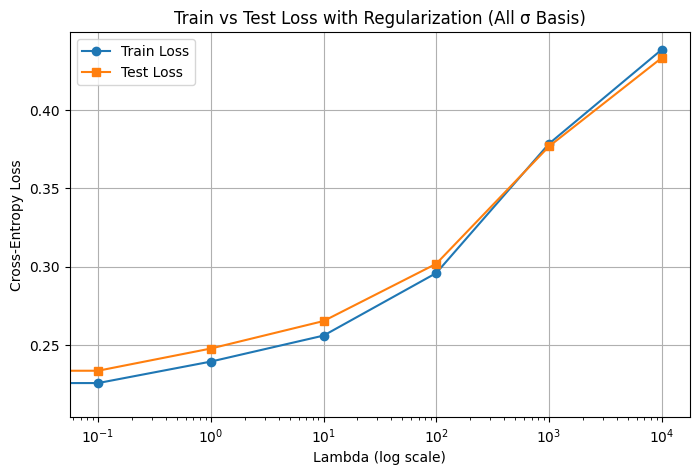

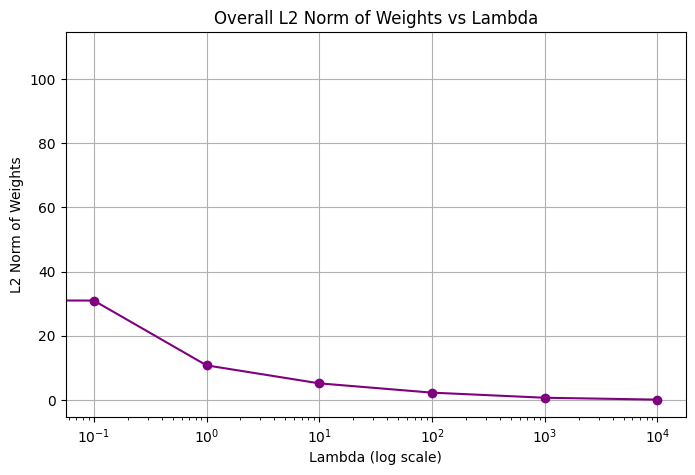

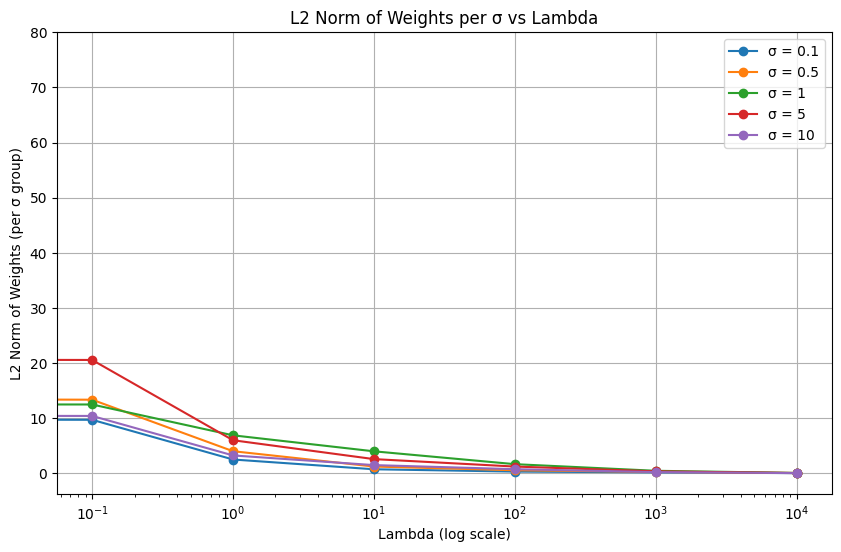

In [103]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

train_loss = []
test_loss = []
weights_norm = []
weights_per_sigma = {sigma: [] for sigma in sigma_values}

for l in lambdas:
    C_val = 1e12 if l == 0 else 1/l

    model = LogisticRegression(penalty='l2', C=C_val, solver='lbfgs', max_iter=2000)
    model.fit(Xtrain_all, ytrain)


    ytrain_prob = model.predict_proba(Xtrain_all)[:, 1]
    ytest_prob  = model.predict_proba(Xtest_all)[:, 1]

    train_loss.append(log_loss(ytrain, ytrain_prob))
    test_loss.append(log_loss(ytest, ytest_prob))


    weights_norm.append(np.linalg.norm(model.coef_))

    n_features_per_sigma = Xtrain_all.shape[1] // len(sigma_values)
    for i, sigma in enumerate(sigma_values):
        start = i * n_features_per_sigma
        end = (i + 1) * n_features_per_sigma
        w_sigma = model.coef_[0, start:end]
        weights_per_sigma[sigma].append(np.linalg.norm(w_sigma))


plt.figure(figsize=(8,5))
plt.plot(lambdas, train_loss, marker='o', label='Train Loss')
plt.plot(lambdas, test_loss, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Train vs Test Loss with Regularization (All σ Basis)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(lambdas, weights_norm, marker='o', color='purple')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('L2 Norm of Weights')
plt.title('Overall L2 Norm of Weights vs Lambda')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
for sigma in sigma_values:
    plt.plot(lambdas, weights_per_sigma[sigma], marker='o', label=f'σ = {sigma}')
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('L2 Norm of Weights (per σ group)')
plt.title('L2 Norm of Weights per σ vs Lambda')
plt.legend()
plt.grid(True)
plt.show()


**1.Cross-Entropy Loss:**


*   Train loss increases with λ.
*   Test loss decreases first (less overfitting), then rises for large λ (underfitting)

**2.Weight Norm:**


*   Overall L2 norm of weights decreases steadily as λ increases → stronger shrinkage.

**3.Per-σ Weight Norm:**


*   Some σ groups (like medium σ) keep higher weight norms → they’re more useful.
*   Small σ and very large σ shrink faster → less useful for prediction.







**(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own)**


If we want Gaussian basis functions to capture relationships between inputs (not just each input separately), you need to use multidimensional Gaussians. That means instead of having basis functions centered on single features, you define them in the full input space, where each basis function depends on multiple inputs together.


**1.** **What changes?**
  

*   Each basis function now has a center vector (for all features) and possibly a covariance matrix to control its shape in multiple dimensions.
*   You will need many more basis functions to cover the input space properly.

**2.Impact on bias-variance:**


*   If we want Gaussian basis functions to capture relationships between inputs (not just each input separately), you need to use multidimensional Gaussians. That means instead of having basis functions centered on single features, you define them in the full input space, where each basis function depends on multiple inputs together.


*   But it increases variance (risk of overfitting) because the model becomes more flexible and needs more data to fit reliably.
*   Regularization becomes even more important to control complexity.












**(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would like to adapt the placement of these functions. Derive a learning algorithm that computes both the placement of the basis function, µi and the weight vector w from data (assuming that the width σ isfixed. You should still allow for L2 regularization of the weight vector. Note that your algorithm will need to be iterative).**

In [82]:

num_iter = 50
eta = 0.01
lambda_reg = 0.1
M = 5
sigma = 1.0

np.random.seed(42)
mu = X[np.random.choice(len(X), M, replace=False), :]
w = np.zeros(M)


for it in range(1, num_iter + 1):
    N, D = X.shape
    Phi = np.zeros((N, M))

    for i in range(M):
        Phi[:, i] = np.exp(-np.sum((X - mu[i])**2, axis=1) / (2*sigma**2))

    w = np.linalg.inv(Phi.T @ Phi + lambda_reg * np.eye(M)) @ (Phi.T @ y)

    for i in range(M):
        grad_mu = np.sum(((Phi @ w - y).reshape(-1,1) * w[i] * Phi[:, i].reshape(-1,1)) * (X - mu[i]) / (sigma**2), axis=0)
        mu[i] -= eta * grad_mu

    if it % 5 == 0 or it == 1:
        train_loss = 0.5 * np.sum((y - Phi @ w)**2) + 0.5 * lambda_reg * np.sum(w**2)
        print(f"Iteration {it}: Train Loss = {train_loss:.4f}")

y_pred_prob = Phi @ w
y_pred_label = (y_pred_prob >= 0.5).astype(int)
accuracy = np.mean(y_pred_label == y)
print(f"Final Training Accuracy: {accuracy:.4f}")

Iteration 1: Train Loss = 0.0000
Iteration 5: Train Loss = 0.0000
Iteration 10: Train Loss = 0.0000
Iteration 15: Train Loss = 0.0000
Iteration 20: Train Loss = 0.0000
Iteration 25: Train Loss = 0.0000
Iteration 30: Train Loss = 0.0000
Iteration 35: Train Loss = 0.0000
Iteration 40: Train Loss = 0.0000
Iteration 45: Train Loss = 0.0000
Iteration 50: Train Loss = 0.0000
Final Training Accuracy: 1.0000


**(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution? Explain your answer.**

Yes, the algorithm converges, but only to a local optimum, not the global one.

Reason:


*   When weights w are fixed, finding w is convex --> easy.
*   But updating centers μi makes the problem non-convex, so many local minima exist.

The above result shows the loss decreasing and stabilizing --> algorithm converged to a local solution, which depends on starting points.

Global optimum is not guaranteed.




**2. Experiment on insurance dataset to demonstrate the Linear Regression and its versions, along with complete data preprocessing steps.**

In [70]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report


In [71]:
df1=pd.read_csv("/content/medical cost personal datasetinsurance.csv")
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
# Strip any leading/trailing spaces from column names
df1.columns = df1.columns.str.strip()

# Convert categorical variables to numerical
df1['sex'] = df1['sex'].map({'male': 0, 'female': 1})
df1['smoker'] = df1['smoker'].map({'no': 0, 'yes': 1})

# One-hot encode the 'region' column
df1 = pd.get_dummies(df1, columns=['region'], drop_first=True)

# Check for missing values
print(df1.isnull().sum())


age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


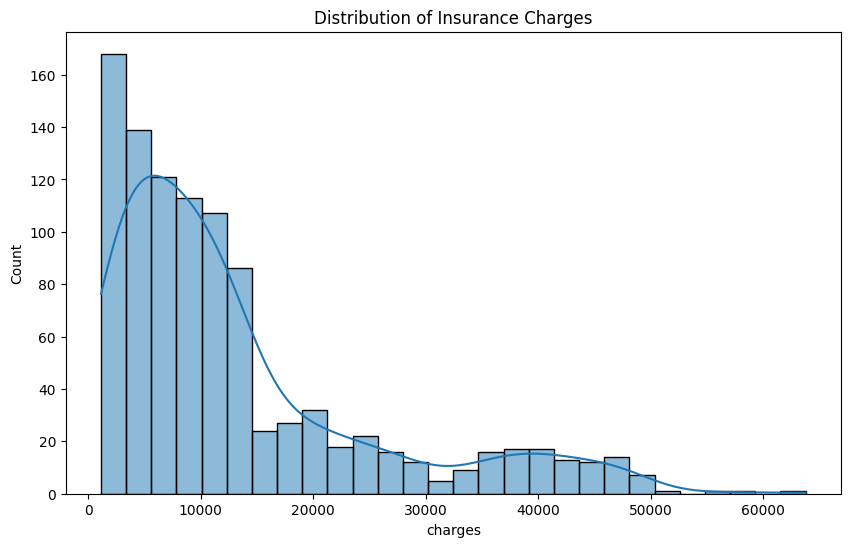

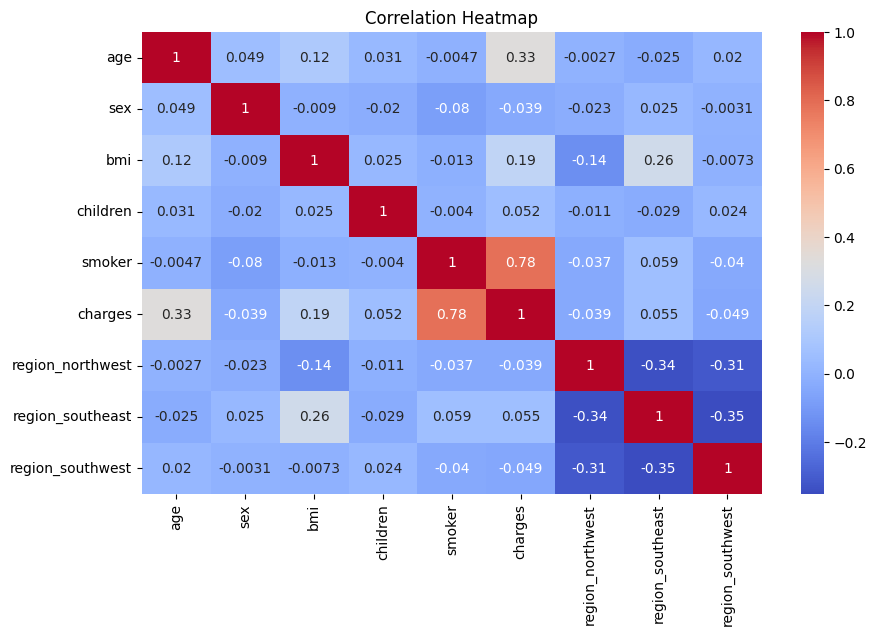

In [87]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df1['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.show()
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [90]:
# Define features and target variable
X = df1.drop('charges', axis=1)
y = df1['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [91]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 42667364.510540985
Root Mean Squared Error: 6532.026064747521
R-squared: 0.7455647237390639


In [92]:
# For logistic regression, we'll predict if a person has high charges
# Define a threshold for high charges
threshold = df1['charges'].median()
df1['high_charges'] = (df1['charges'] > threshold).astype(int)

# Define features and target variable
X = df1.drop(['charges', 'high_charges'], axis=1)
y = df1['high_charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [93]:
# Initialize and train the model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.905
Confusion Matrix:
[[93  7]
 [12 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       100
           1       0.93      0.88      0.90       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



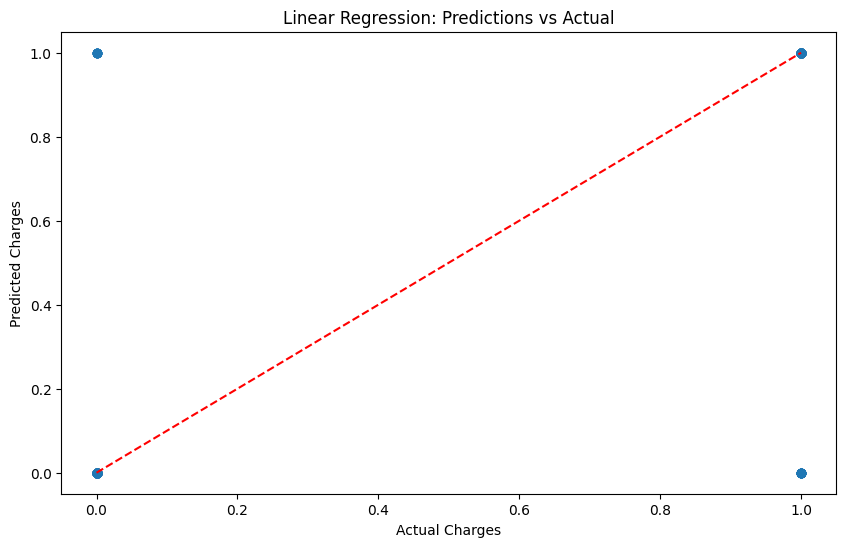

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


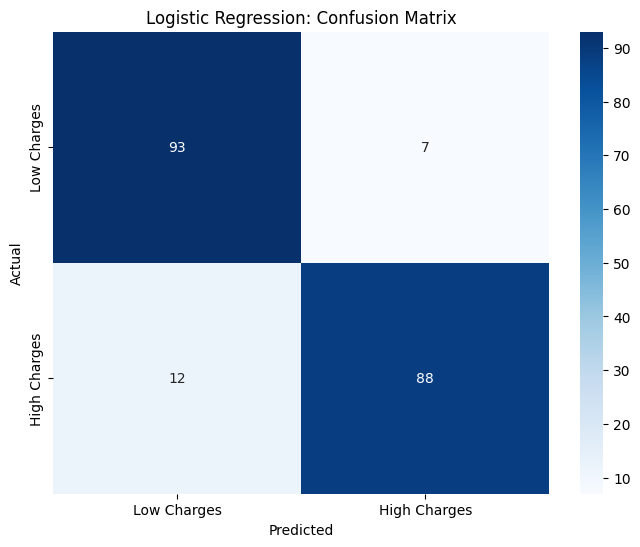

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Charges', 'High Charges'], yticklabels=['Low Charges', 'High Charges'])
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
